## <span style="color:brown"> Laboratorio di Simulazione Numerica - Esercitazione 12 </span>

### Esercizio 12.1

L'obiettivo di questa esercitazione è utilizzare modelli di **Deep Neural Network**, con l'aiuto della libreria *Keras* in Python, per identificare correttamente le cifre presenti in immagini contenenti una delle 10 cifre scritte a mano.
Il dataset utilizzato, chiamato **MNIST**, consiste in un insieme di 70000 cifre scritte a mano rappresentate come matrice di dimensioni 28x28 riempita con valori interi $\in [0,255]$.
Dato che ci sono 10 categorie nel problema, corrispondenti alle 10 cifre da riconoscere, si tratta di un problema di classificazione.

L'obiettivo è sviluppare un modello di rete neurale che possa assegnare correttamente ogni immagine alla cifra corrispondente.
Utilizzando il codice messo a disposizione, ho fatto varie prove e ho ottenuto buoni risultati scegliendo come ottimizzatore *adam* con numero di epoche uguale a 20.

In [1]:
import os
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

2024-07-19 14:21:48.674530: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-19 14:21:48.858089: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-19 14:21:49.536991: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-19 14:21:51.836656: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/andrea/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape data, it could depend on Keras backend
#flattening
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols) 
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    # mette in modo casuale degli input=0 in modo da evitare overfitting
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    #attivazione è softmax che rende probabilità le dieci componenti
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [4]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer="adam",
                  metrics=['acc']) #metrica non obbligatoria
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [5]:
# training parameters
batch_size = 32
epochs = 20

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

/home/andrea/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - acc: 0.8562 - loss: 0.4746 - val_acc: 0.9639 - val_loss: 0.1163
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - acc: 0.9603 - loss: 0.1385 - val_acc: 0.9700 - val_loss: 0.0952
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - acc: 0.9728 - loss: 0.0917 - val_acc: 0.9737 - val_loss: 0.0950
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - acc: 0.9767 - loss: 0.0763 - val_acc: 0.9778 - val_loss: 0.0816
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - acc: 0.9812 - loss: 0.0609 - val_acc: 0.9757 - val_loss: 0.0899
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - acc: 0.9850 - loss: 0.0496 - val_acc: 0.9793 - val_loss: 0.0844
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - acc: 0.9870 - loss: 0.0436 - val_acc: 0.9793 - val_loss: 0.0865
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - acc: 0.9887 - loss: 0.0348 - val_acc: 0.9808 - val_loss: 0.0890
Epoch 9/20
1875/1875 ━━━━━━━━━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9771 - loss: 0.1670

Test loss: 0.13916057348251343
Test accuracy: 0.9807999730110168


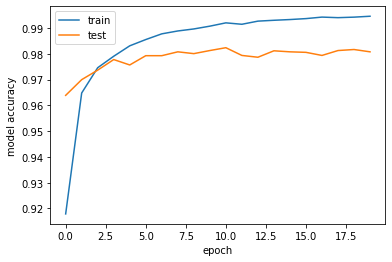

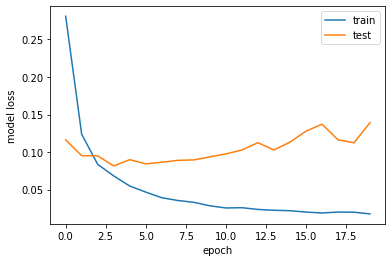

In [6]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

E' possibile osservare che l'accuratezza rispetto al test set si stabilizza intorno alle 10 epoche. Sempre intorno alle 10 epoche invece la funzione di costo inizia ad aumentare, questo potrebbe essere un segnale del fatto che il sistema sta andando in *overfitting* e che è necessario fermarsi.

In [7]:
predictions = model_DNN.predict(X_test)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


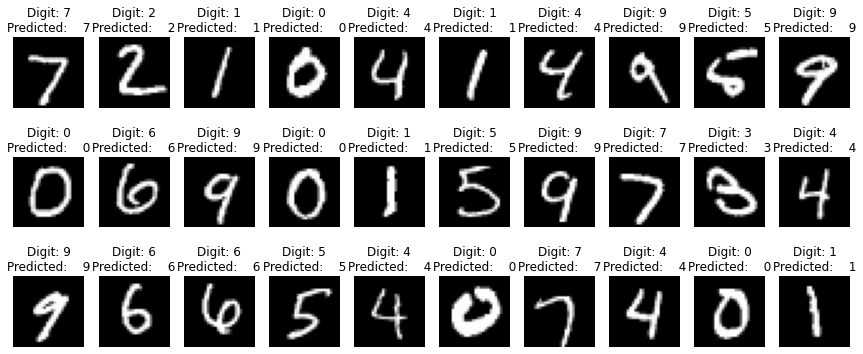

In [8]:
plt.figure(figsize=(15, 15)) 
for i in range(30):    
    ax = plt.subplot(7, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Ho testato altri ottimizzatori, non riporto tutti i risultati per non appensatire il notebook. Di seguito i risultati ottenuti:

 - *sgd*: convergenza non velocissima, assolutamente necessarie almeno 20 epoche per ottenere un buon risultato.
 - *RMSprop*: convergenza più veloce di sgd, già con 10 epoche si ottengono buoni risultati con accuratezza intorno al 97.5%. Come per *adam* ad un certo punto la funzione di        costo relativa al test set inizia ad aumentare.
 - *adam*: analizzato precedentemente, buona velocità di convergenza e ottima accuratezza.
 - *adadelta*: convergenza molto lenta e minore capacità predittiva anche con una ventina di epoche (circa 88%)

### Esercizio 12.2

In questo esercizio ho cambiato l'architettura della mia DNN utilizzando layers convoluzionali. Per fare questo, mi sono servito di layers come:

 - *Conv2D*: utilizzando filtri convoluzionali, chiamati *kernel*, estrae le caratteristiche principali delle immagini;
 - *Dropout*: spegne a caso alcuni neuroni per prevenire l'*overfitting* e irrobustire il modello;
 - *MaxPooling2D*: layer che riduce le dimensioni dell'immagine in input selezionando il valore massimo di un pixel all'interno di una finestra di dimensioni fissate;
 - *Flatten*: appiattisce l'input, facendo passare da 2D ad una 1D: permette di passare dall'utilizzo di layers convoluzionali a layers densi;
 - *Soft-max*: configura l'output in una distribuzione di probabilità basata sul numero delle classi;

Ho allenato il modello così strutturato per 50 epoche.

In [13]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [14]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    
    # ADD HERE SOME OTHER LAYERS AT YOUR WILL, FOR EXAMPLE SOME: Dropout, 2D pooling, 2D convolutional etc. ... 
    # remember to move towards a standard flat layer in the final part of your DNN,
    # and that we need a soft-max layer with num_classes=10 possible outputs
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])
    return model

In [15]:
# training parameters
batch_size = 32
epochs = 50 # INSERT HERE AN ADEQUATE NUMBER OF EPOCHS!

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history = model_CNN.fit(X_train, Y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

/home/andrea/anaconda3/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - acc: 0.5104 - loss: 1.3956 - val_acc: 0.9466 - val_loss: 0.1754
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - acc: 0.9153 - loss: 0.2815 - val_acc: 0.9667 - val_loss: 0.1104
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - acc: 0.9422 - loss: 0.1939 - val_acc: 0.9733 - val_loss: 0.0864
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - acc: 0.9538 - loss: 0.1593 - val_acc: 0.9781 - val_loss: 0.0707
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - acc: 0.9603 - loss: 0.1390 - val_acc: 0.9809 - val_loss: 0.0620
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - acc: 0.9644 - loss: 0.1208 - val_acc: 0.9809 - val_loss: 0.0577
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - acc: 0.9679 - loss: 0.1110 - val_acc: 0.9822 - val_loss: 0.0515
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - acc: 0.9689 - loss: 0.1070 - val_acc: 0.9831 - val_loss: 0.0486
Epoch 9/50
1875/1875 ━━━━━━━━━━━

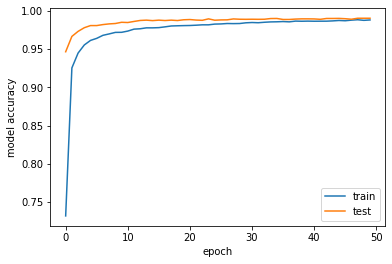

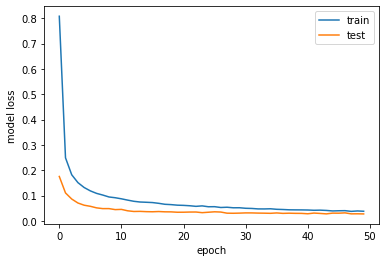

In [16]:
# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


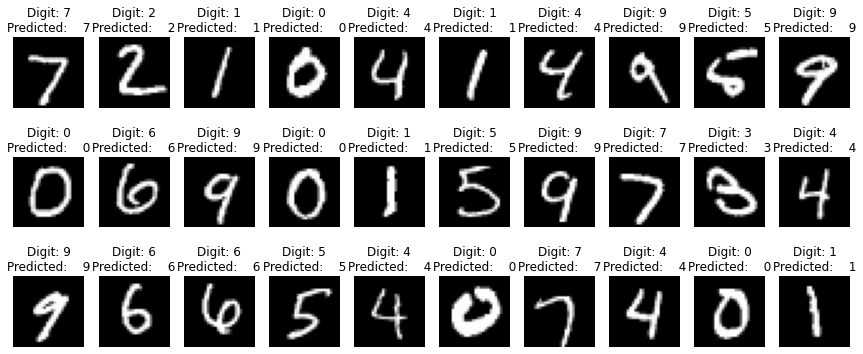

In [18]:
predictions = model_CNN.predict(X_test)

plt.figure(figsize=(15, 15)) 
for i in range(30):    
    ax = plt.subplot(7, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Tutte le cifre vengono riconosciute!

### Esercizio 12.3

In questo ultimo esercizio utilizzo la rete neurale appena addestrata per riconoscere cifre scritte da me a mano.

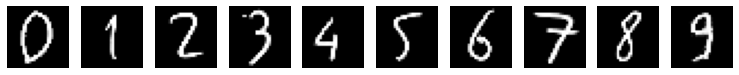

In [20]:
from PIL import Image

data = []
plt.figure(figsize=(13,10))

for l in range(10):
    index = str(l)
    digit_filename = index+"_test.png"
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size
    pix=digit_in.load();
    data_back = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data_back[i,j]=pix[j,i]/255
    data.append(data_back)

    ax = plt.subplot(6, 10, l + 1)
    plt.imshow(data[l], cmap='gray')
    plt.axis('off')
plt.show()

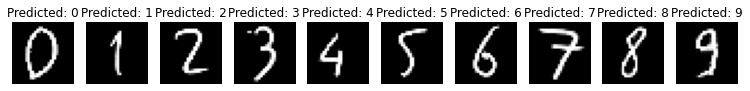

In [21]:
plt.figure(figsize=(13,10))

for l in range(10):
    data1 = data[l].reshape(1, xdim, ydim, 1)  # Reshape to match CNN input shapeprint(data.shape)
    pred_0 = model_CNN.predict(data1, verbose=0)

    data1 = data1.reshape(xdim,ydim)


    ax = plt.subplot(3, 10, l + 1)
    plt.imshow(data1, cmap='gray')    
    plt.title("Predicted: {}".format(np.argmax(pred_0)))
    plt.axis('off') 
    
plt.show()

La rete ha riconosciuto dieci cifre su dieci!